# 01a ReadData_Discussion

Contents
 - Import packages
 - Review of memory requirements and issues
 
Notes
 - 


**Import packages and set directories**

In [1]:
# system commands
import os

# load and save data
import pickle

# data manipulation
import numpy as np
import pandas as pd

# graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)

1.16.4
0.23.1


In [3]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"

/home/jovyan/Projects/final_assignment/PCode


**Subsets of data**

Even if we can store the whole data (see the details below), copying it to h2o and then running various models seems to take something like 16 gig. Also full runs can take a long time, so it is better to run initial experiments on a subset of the data. 

Therefore subsets with 250k records (train_250k) and 1m records (train_1m) were previously created (01a ReadData_Downsample_Test).

**Memory issues**

When running Docker on mac, the default maximum memory is set to 2gig.  This can be seen (and changed) in the Docker Dashboard.  The size of the Pandas dataframe required to stored the data when using default pd.read_csv is around 1.5 gig, BUT the memory usage whilst reading this in, peaks at close to 4 gig.  This can be seen by running the command "docker stats" from the terminal command line and watching as the data is read in.

Without enough memory available to your container you will just get an error - something like "kernel died and needs to restart", or something like that.  The error will not make it clear that you ran out of memory.  

So I began to look at memory usage of the data frame.  I should mention that at this point, I had missings in many of the numerics.

Having read in the data, I then looked at the dtypes.  Strings were stored as objects.  Numbers were stored as float64 or int64.  Both of these are much larger than needed.  I therefore printed the dict of dtypes, using "df_train.dtypes.to_dict()" and manually changed the dtypes as necessary.

Changing just dtype Object to category reduced the memory of df_train to 1.5 gig to 0.831 gig.  However, this doing this is problematic since, the creation of categorical separately for test data could create different categoricals.

Most of the integers have a range -127 to 127 and so can be stored with int8.  a04 goes up to 240 and so can be stored with a uint8 or int16.  Unfortunately (as discussed at the start of Week 4), NA's will cause int's to be upcast to floats - since NA is a float.  Downcasting those we can (because there are no missings) to int8, takes  us down to 0.5 gig. At this stage I went back to the original data and replaced all missing numbers with -99 (having checked that this is not otherwise in those fields).

After this - size is 0.203 gig.  (Using object type instead of category, size is 0.77 gig)

Datasets here are smaller since limited to 250k or 1m

In [4]:
dtypes_cat = {
 'target': 'int8',
 'a01': "category",
 'a02': "category",
 'a03': "category",
 'a10': "category",
 'a11': "int8",
 'a12': "category",
 'a13': "category",
 'a16': "category",
 'a17': "category",
 'a18': "category",
 'a19': "category",
 'a20': "category",
 'b02': "category",
 'b03': "category",
 'b04': "category",
 'b07': "category",
 'c02': "category",
 'c04': "category",
 'c05': "category",
 'c06': "category",
 'c07': "category",
 'c08': "category",
 'c09': "category",
 'e01': "category",
 'e03': "category",
 'e11': "category",
 'e13': "category",
 'e14': "category",
 'e21': "category",
 'e22': "category",
 'e24': "category",
 'e25': "category",
 'e17': "category",
 'e18': "category",
 'e19': "category",
 'e20': "category",
 'f03': "category",
 'f04': "category",
 'f05': "category",
 'f07': "category",
 'f09': "category",
 'f27': "category",
 'f29': "category",
 'f30': "category",
 'f33': "category",
 'f34': "category",
 'f10': "category",
 'a04': 'int16',
 'a05': 'int8',
 'a06': 'int8',
 'a07': 'int8',
 'a08': 'int8',
 'a09': 'int8',
 'a14': 'int8',
 'a15': 'int8',
 'b01': 'int8',
 'b05': 'int8',
 'b06': 'int8',
 'c01': 'int8',
 'c03': 'int8',
 'd01': 'int8',
 'd02': 'int8',
 'd03': 'int8',
 'e02': 'int8',
 'e04': 'int8',
 'e05': 'int8',
 'e06': 'int8',
 'e07': 'int8',
 'e08': 'int8',
 'e09': 'int8',
 'e12': 'int8',
 'e15': 'int8',
 'e16': 'int8',
 'e23': 'int8',
 'f01': 'int8',
 'f02': 'int8',
 'f06': 'int8',
 'f08': 'int8',
 'f11': 'int8',
 'f13': 'int8',
 'f15': 'int8',
 'f16': 'int8',
 'f17': 'int8',
 'f18': 'int8',
 'f19': 'int8',
 'f20': 'int8',
 'f21': 'int8',
 'f22': 'int8',
 'f23': 'int8',
 'f24': 'int8',
 'f25': 'int8',
 'f26': 'int8',
 'f28': 'int8',
 'f31': 'int8',
 'f32': 'int8',
 'unique_id': 'int64'}


In [5]:
dtypes_object = {
 'a01': "O",
 'a02': "O",
 'a03': "O",
 'a10': "O",
 'a11': "int8",
 'a12': "O",
 'a13': "O",
 'a16': "O",
 'a17': "O",
 'a18': "O",
 'a19': "O",
 'a20': "O",
 'b02': "O",
 'b03': "O",
 'b04': "O",
 'b07': "O",
 'c02': "O",
 'c04': "O",
 'c05': "O",
 'c06': "O",
 'c07': "O",
 'c08': "O",
 'c09': "O",
 'e01': "O",
 'e03': "O",
 'e11': "O",
 'e13': "O",
 'e14': "O",
 'e21': "O",
 'e22': "O",
 'e24': "O",
 'e25': "O",
 'e17': "O",
 'e18': "O",
 'e19': "O",
 'e20': "O",
 'f03': "O",
 'f04': "O",
 'f05': "O",
 'f07': "O",
 'f09': "O",
 'f27': "O",
 'f29': "O",
 'f30': "O",
 'f33': "O",
 'f34': "O",
 'f10': "O",
 'a04': 'int16',
 'a05': 'int8',
 'a06': 'int8',
 'a07': 'int8',
 'a08': 'int8',
 'a09': 'int8',
 'a14': 'int8',
 'a15': 'int8',
 'b01': 'int8',
 'b05': 'int8',
 'b06': 'int8',
 'c01': 'int8',
 'c03': 'int8',
 'd01': 'int8',
 'd02': 'int8',
 'd03': 'int8',
 'e02': 'int8',
 'e04': 'int8',
 'e05': 'int8',
 'e06': 'int8',
 'e07': 'int8',
 'e08': 'int8',
 'e09': 'int8',
 'e12': 'int8',
 'e15': 'int8',
 'e16': 'int8',
 'e23': 'int8',
 'f01': 'int8',
 'f02': 'int8',
 'f06': 'int8',
 'f08': 'int8',
 'f11': 'int8',
 'f13': 'int8',
 'f15': 'int8',
 'f16': 'int8',
 'f17': 'int8',
 'f18': 'int8',
 'f19': 'int8',
 'f20': 'int8',
 'f21': 'int8',
 'f22': 'int8',
 'f23': 'int8',
 'f24': 'int8',
 'f25': 'int8',
 'f26': 'int8',
 'f28': 'int8',
 'f31': 'int8',
 'f32': 'int8',
 'unique_id': 'int64'}

In [6]:
df_train_250k = pd.read_csv(dirRawData + 'train_250k.csv',
                       na_values = 'NA',
                       dtype=dtypes_cat)


In [7]:
df_train_250k.shape

(250000, 97)

In [8]:
df_train_250k.head(3)

,target,a01,a02,a03,a10,a12,a13,a16,a17,a18,...,f21,f22,f23,f24,f25,f26,f28,f31,f32,unique_id
0,1,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,1
1,1,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,2
2,0,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,3


In [9]:
df_train_1m = pd.read_csv(dirRawData + 'train_1m.csv',
                          na_values = 'NA',
                          dtype=dtypes_cat)


In [10]:
df_train_1m.shape

(1000000, 97)

In [11]:
df_train_1m.head(3)

,target,a01,a02,a03,a10,a12,a13,a16,a17,a18,...,f21,f22,f23,f24,f25,f26,f28,f31,f32,unique_id
0,1,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,1
1,1,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,2
2,0,D,C,H,Z,C,A,Z,Z,F,...,0,0,0,0,0,0,5,0,0,3


In [12]:
# How much memory is df_train using?
mem_used = df_train_250k.memory_usage().sum() / (2<<29)
print("df_train_250k is using {:.3f} gig".format(mem_used))

mem_used = df_train_1m.memory_usage().sum() / (2<<29)
print("df_train_1m is using {:.3f} gig".format(mem_used))

del mem_used

df_train_250k is using 0.026 gig
df_train_1m is using 0.104 gig


In [13]:
print('df_train_250k: ', df_train_250k.shape)
print('df_train_1m: ', df_train_1m.shape)

df_train_250k:  (250000, 97)
df_train_1m:  (1000000, 97)


In [14]:
df_train_250k.describe()

,target,a04,a05,a06,a07,a08,a09,a11,a14,a15,...,f21,f22,f23,f24,f25,f26,f28,f31,f32,unique_id
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.491324,6.903144,-9.386240,-9.345580,-9.404692,-0.717460,-0.743672,-9.450632,-8.893176,-1.160280,...,0.007520,0.054716,0.002184,0.006372,0.006712,0.006892,4.865152,-0.052596,-0.045272,143792.519984
std,0.499926,105.420879,29.060973,29.075491,29.054350,8.491813,9.028689,29.113582,29.597655,21.719172,...,0.087633,0.261783,0.047194,0.079921,0.082722,0.087753,0.740747,0.473555,0.457707,82924.052696
min,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,1.000000
25%,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,71971.750000
50%,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,143807.500000
75%,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,215648.250000
max,1.000000,240.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,8.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000,287342.000000


**Checking the cardinality**

For my own work, I decided to start of with anything above cardinality of 30 to be treated as an hccv. This is not necessarily optimal and you should feel to ingnore this.

In [15]:
cols_numeric = list(df_train_1m.select_dtypes(include=[np.number]).columns.values)
cols_notNumeric = [var for var in df_train_1m.columns if var not in cols_numeric]
srs_card = df_train_1m[cols_notNumeric].nunique()
print(srs_card.min())
print(srs_card.max())
srs_card[srs_card>30]

2
35575


e17       95
e18      820
e19    35575
f10     1864
dtype: int64

In [16]:
vars_ind_hccv = srs_card[srs_card>30].index.values.tolist()  #dynamic alternative to hardcoding done by prof
vars_ind_hccv = ['e17', 'e18', 'e19', 'f10']

**Read in the test data**

Saving disk space by reading in strings as factors is great - but how do we get the test data now to have the same factor levels?

I will read in factors as objects, and then manually convert each object to a factor with the same index for levels and the categories in df_train.

In [17]:
# df_test = pd.read_csv(dirRawData + 'test_k1.csv',
df_test = pd.read_csv(dirRawData + 'test.csv',
                      na_values = 'NA',
                      dtype=dtypes_object)


In [18]:
# find the categorical vars - this includes the hccv
vars_ind_categorical = list(df_train_1m.columns[df_train_1m.dtypes == 'category'])

# Check how the index of the levels of factors is stored, and print them out
for var in vars_ind_categorical:
    print(df_train_1m[var].cat.categories)
    
# In this version notebook ,the first printed line shows the issue, code C is last
# in the index:
# Index(['A', 'B', 'D', 'F', 'G', 'H', 'C'], dtype='object')

Index(['A', 'B', 'D', 'F', 'G', 'H', 'C'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], dtype='object')
Index(['N', 'Y', 'Z'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
Index(['A', 'B', 'C', 'E', 'F'], dtype='object')
Index(['N', 'Y', 'Z'], dtype='object')
Index(['N', 'Y', 'Z'], dtype='object')
Index(['E', 'F', 'D'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object')
Index(['A', 'B', 'F'], dtype='object')
Index(['Z', 'B'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtyp

In [19]:
# Now for each relevant variable in df_test, replace it with a categorical
for var in vars_ind_categorical:
    var_levels = df_train_1m[var].cat.categories.values
    df_test[var] = pd.Categorical(df_test[var], categories=var_levels, ordered=False)

In [20]:
# Check that the index for a01 is stored in the same order as in df_train.  It is.
df_test['a01'].cat.categories

Index(['A', 'B', 'D', 'F', 'G', 'H', 'C'], dtype='object')

**Define variable lists**

 - var_dep: the target feature
 - vars_notToUse:  the variables that will not be included in the experiments
 - vars_ind: the independent variables
 - vars_ind_numeric: the numeric independent variables
 - vars_ind_hccv: Three high cardinality categorical variables
 - vars_ind_categorical: the categorical independent variables.

In [21]:
vars_all = df_train_1m.columns.values
var_dep = ['target']

vars_notToUse = ['id'] 
vars_ind = [var for var in vars_all if var not in (vars_notToUse + var_dep)]

vars_ind_numeric = [var for var in vars_ind if var not in vars_ind_categorical]


In [22]:
srs_missing = df_train_1m.isnull().sum(axis=0)
srs_missing[srs_missing > 0] 
# there are no missing data - but REMEMBER, numeric value -99 is missing!!

Series([], dtype: int64)

**Correlation of the numerical variables**

Most of the numerical variables do not have high correlation between each other. However, there are some set of variables e.g. 'v_num_98' with 'v_num_79' which have high correlation (white squares).

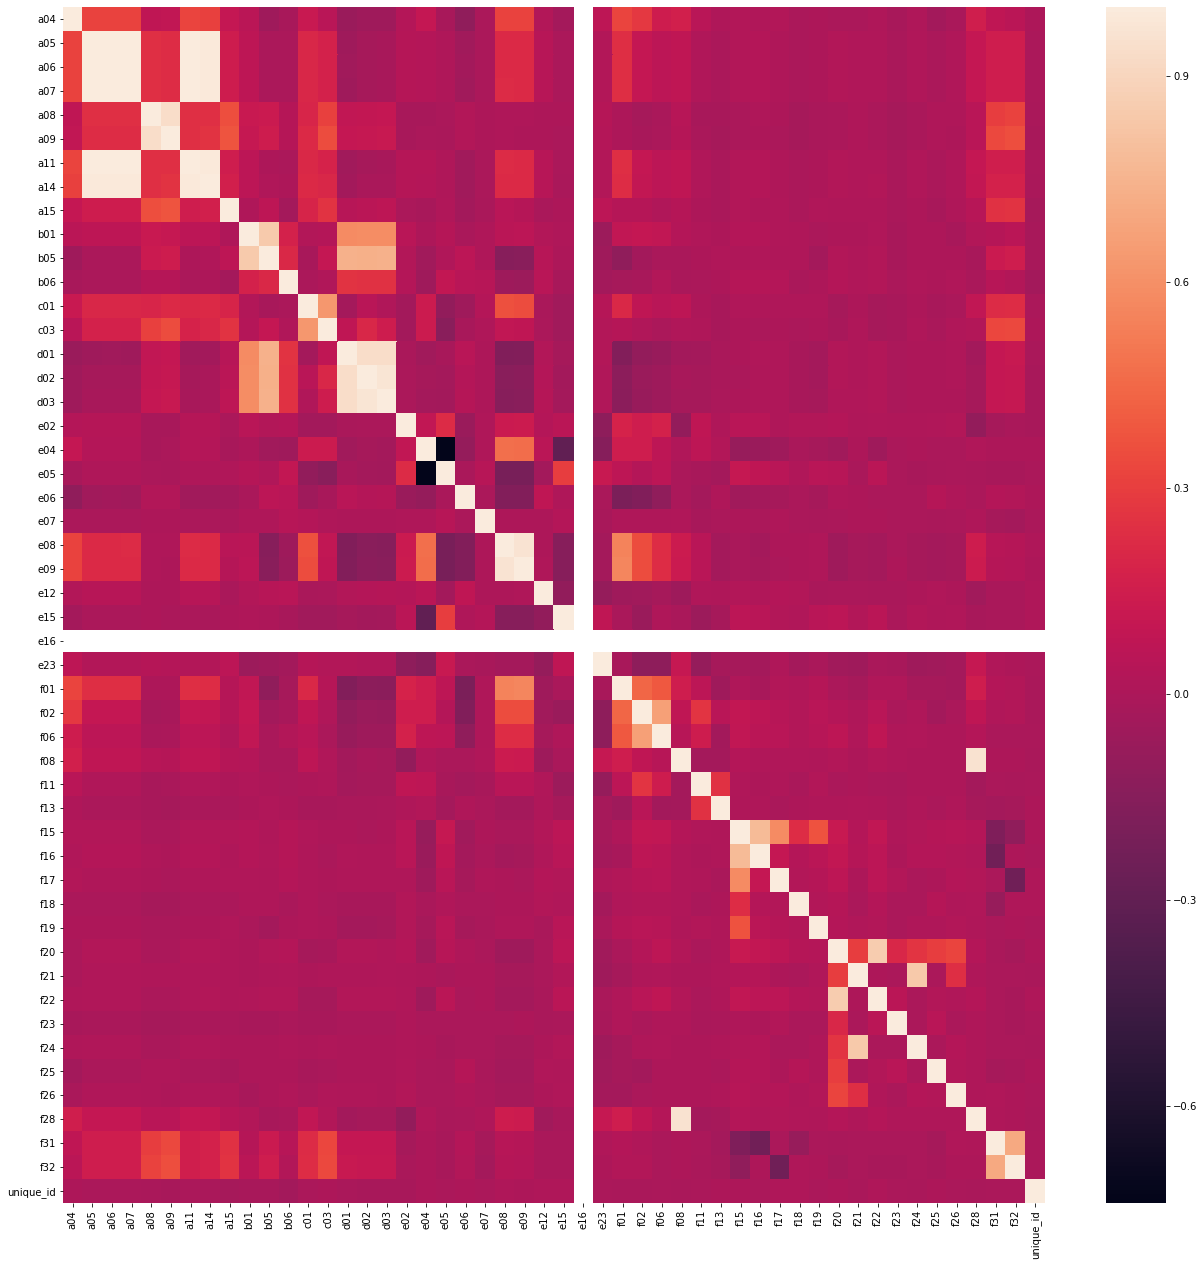

In [23]:
corr = df_train_1m.loc[1:10000, vars_ind_numeric].corr()
ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Save Data

I tried two ways of storing the data.  hd5 file stores and pickle.

We have already been using pickle, a traditional Python way to store any object.  Objects are convered to a stream of bytes and sent to a file.

hd5 filestores:  See https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

It is efficient for storing homoegeneous blocks of data.  It allows retrieval of specific bits of the data stored in it - unlike pickle where you have to load the whole object even if you only want part of the data.  This means that hd5 is very good for storing huge files.

By the way, our data table is not homogeneous (since it has categories and integers).  Also the categories are not a type it is comfortable with.  So we should not expect good performance. 

The pickle output is smaller (259m vs 295m) and took much less time to store (1.69s vs 7.95s).

For the moment I will continue to use pickle.

In [24]:
#%%time
#store = pd.HDFStore(dirPData + '01_df_o.h5')
#df_train.to_hdf(store, 'df_train', format="table")
#df_test.to_hdf(store, 'df_test', format="table")
#store.close()

#CPU times: user 5.37 s, sys: 971 ms, total: 6.34 s
#Wall time: 7.95 s

In [25]:
%%time
dict_ = {'df_train': df_train_1m,
         'df_test': df_test}

f_name = dirPData + '01_df_1m.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name, dict_


CPU times: user 133 ms, sys: 195 ms, total: 327 ms
Wall time: 557 ms


In [26]:
%%time
dict_ = {'df_train': df_train_250k,
         'df_test': df_test}

f_name = dirPData + '01_df_250k.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name, dict_


CPU times: user 58.4 ms, sys: 92.7 ms, total: 151 ms
Wall time: 308 ms


In [27]:
# store variable names to pickle
dict_ = {'vars_ind_numeric': vars_ind_numeric,
         'vars_ind_categorical': vars_ind_categorical,
         'vars_ind_hccv': vars_ind_hccv,
         'vars_notToUse': vars_notToUse,
         'var_dep': var_dep}

f_name = dirPData + '01_vars.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name, dict_